In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import zipfile

with zipfile.ZipFile('data/tpsgc-pwgsc_co-ch_tous-all.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
contractHistory = pd.read_csv('data/tpsgc-pwgsc_co-ch_tous-all.csv', usecols = range(0,42))
contractHistory.columns

Index(['contract-number', 'amendment-number', 'award-date', 'expiry-date',
       'contract-value', 'gsin', 'gsin-description_en', 'gsin-description_fr',
       'competitive-tender_en', 'competitive-tender_fr',
       'limited-tender-reason', 'limited-tender-reason-description_en',
       'limited-tender-reason-description_fr', 'solicitation-procedure',
       'solicitation-procedure-description_en',
       'solicitation-procedure-description_fr', 'trade-agreement',
       'trade-agreement-description_en', 'trade-agreement-description_fr',
       'supplier-standardized-name', 'supplier-operating-name',
       'supplier-legal-name', 'supplier-address-city',
       'supplier-address-prov-state', 'supplier-address-postal-code',
       'supplier-address-country', 'organization-employee-count_en',
       'organization-employee-count_fr', 'total-contract-value',
       'number-records', 'end-user-entity_en', 'end-user-entity_fr',
       'contracting-entity-office-name_en',
       'contractin

In [7]:
contractHistory.head()

,contract-number,amendment-number,award-date,expiry-date,contract-value,gsin,gsin-description_en,gsin-description_fr,competitive-tender_en,competitive-tender_fr,...,contracting-entity-office-name_en,contracting-entity-office-name_fr,contracting-address-street-1,contracting-address-street-2,contracting-address-city,contracting-address-prov-state,contracting-address-postal-code,contracting-address-country,procurement-entity-name_en,procurement-entity-name_fr
0,F2599-090025/001/MD,000,2009-06-16,2009-10-20,30174.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
1,F2599-090025/001/MD,001,2009-07-15,2009-10-20,4876.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
2,F2599-090025/001/MD,002,2009-07-20,2009-10-20,26914.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
3,E60LP-090002/392/LP,000,2010-01-01,2010-12-31,25000.0,V502B,"Hotels, Motels and Commercial Accommodation","Hôtels, motels et logements commerciaux",Yes,Oui,...,CONSOLIDATED PROC LP ICPSS,N/D,PORTAGE III 7B3,11 LAURIER ST,GATINEAU,Quebec,K1A0S5,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
4,E60LP-110001/050/LP,000,2012-01-01,2012-12-31,25000.0,V502B,"Hotels, Motels and Commercial Accommodation","Hôtels, motels et logements commerciaux",Yes,Oui,...,CONSOLIDATED PROC LP ICPSS,N/D,PORTAGE III 7B3,11 LAURIER ST,GATINEAU,Quebec,K1A0S5,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...


In [8]:
contractHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441210 entries, 0 to 441209
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   contract-number                        441210 non-null  object 
 1   amendment-number                       441210 non-null  object 
 2   award-date                             441210 non-null  object 
 3   expiry-date                            441210 non-null  object 
 4   contract-value                         441210 non-null  float64
 5   gsin                                   441199 non-null  object 
 6   gsin-description_en                    441199 non-null  object 
 7   gsin-description_fr                    441210 non-null  object 
 8   competitive-tender_en                  441210 non-null  object 
 9   competitive-tender_fr                  441210 non-null  object 
 10  limited-tender-reason                  94299 non-null   

In [9]:
contractHistory.describe()

,contract-value,limited-tender-reason,total-contract-value,number-records
count,4.412100e+05,94299.000000,4.412100e+05,441210.000000
mean,4.398310e+05,75.398689,8.457397e+06,8.202300
std,1.609191e+07,7.860150,1.061860e+08,18.275149
min,-1.540262e+08,8.000000,-1.985487e+08,1.000000
25%,0.000000e+00,71.000000,2.096325e+04,1.000000
50%,8.715000e+03,71.000000,1.268150e+05,3.000000
75%,6.941075e+04,85.000000,7.749660e+05,6.000000
max,5.221000e+09,90.000000,5.761974e+09,206.000000


In [10]:
contractHistory['contract-number'].describe()

count                   441210
unique                  199675
top       E0208-150548/001/PWZ
freq                       206
Name: contract-number, dtype: object

In [11]:
contractHistory['contract-number'].value_counts()

E0208-150548/001/PWZ    206
EN578-110558/001/XL     162
EP008-112560/001/GC     152
EP008-112560/004/GC     139
EW038-140681/001/PWU    139
                       ... 
W0113-10A128/001/BOR      1
5K003-156233/001/WPG      1
5K003-148856/001/WPG      1
W8482-128975/001/GRK      1
U4030-221421/001/HN       1
Name: contract-number, Length: 199675, dtype: int64

In [12]:
contractHistory['amendment-number'].describe()

count     441210
unique       237
top          000
freq      174270
Name: amendment-number, dtype: object

In [13]:
contractHistory['amendment-number'].value_counts()

000    174270
001     83486
002     48913
003     31260
004     20650
        ...  
169         1
170         1
171         1
172         1
205         1
Name: amendment-number, Length: 237, dtype: int64

<AxesSubplot:>

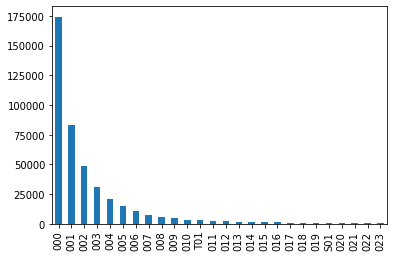

In [14]:
#contractHistory['amendment-number'].value_counts().plot(kind = 'bar')
amendNo = contractHistory['amendment-number'].value_counts()
amendNo2 = amendNo[amendNo > 500]
amendNo2.plot(kind = 'bar')

In [15]:
contractHistory['award-date'].describe()

count         441210
unique          4085
top       2011-01-01
freq            2277
Name: award-date, dtype: object

In [16]:
contractHistory['award-date'].value_counts()

2011-01-01    2277
2010-01-01    2211
2012-01-01    2200
2009-01-01    1609
2014-02-10     777
              ... 
2010-07-25       1
2010-12-19       1
2013-02-24       1
2015-11-07       1
2012-05-27       1
Name: award-date, Length: 4085, dtype: int64

In [17]:
contractHistory['expiry-date'].describe()

count         441210
unique          6859
top       2011-03-31
freq            9500
Name: expiry-date, dtype: object

In [18]:
contractHistory['expiry-date'].value_counts()

2011-03-31    9500
2010-03-31    8145
2012-03-31    8012
2017-03-31    6836
2013-03-31    6546
              ... 
2027-01-05       1
2018-07-26       1
2028-03-06       1
2025-02-26       1
2025-03-13       1
Name: expiry-date, Length: 6859, dtype: int64

In [19]:
contractHistory['gsin-description_en'].describe()

count           441199
unique            5188
top       ADP Software
freq             26529
Name: gsin-description_en, dtype: object

In [20]:
contractHistory['gsin-description_en'].value_counts()

ADP Software                                                                                   26529
Hotels, Motels and Commercial Accommodation                                                    17226
Informatics Professional Services                                                              16767
Human Resource Services, Business Consulting/Change Management; Project Management Services     8967
Construction of Other Buildings                                                                 7803
                                                                                               ...  
PACK CARRIER, COMBAT EQUIPMENT                                                                     1
Printing Letterpress                                                                               1
Lumber, Softwood (Balsam, Fir and Jack Pine)                                                       1
Pumping Equipment, Portable (Firefighting, Ground)                                         

In [21]:
contractHistory['competitive-tender_en'].describe()

count     441210
unique         2
top          Yes
freq      346895
Name: competitive-tender_en, dtype: object

In [22]:
contractHistory['competitive-tender_en'].value_counts()

Yes    346895
No      94315
Name: competitive-tender_en, dtype: int64

<AxesSubplot:>

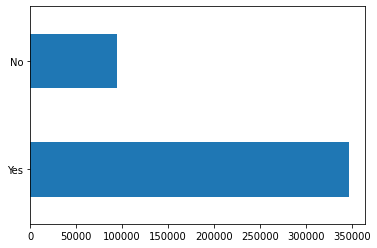

In [23]:
contractHistory['competitive-tender_en'].value_counts().plot(kind = 'barh')

In [24]:
contractHistory['limited-tender-reason-description_en'].describe()

count                94299
unique                  16
top       Exclusive Rights
freq                 57400
Name: limited-tender-reason-description_en, dtype: object

In [25]:
contractHistory['limited-tender-reason-description_en'].value_counts()

Exclusive Rights                                                    57400
Low Dollar Value                                                    20183
Government Objectives Representing Best Interests/Value to Govt      7357
Interchangeable Parts                                                6622
Extreme Urgency                                                      1123
Prices and/or Sources Fixed by Government Regulations                 570
Consulting Services Regarding Matters of a Confidential Nature        453
Prototype Purchase                                                    185
National Security Consideration                                       101
Exceptional Circumstances Under Article 508 (1) of AIT                 72
Protection of Human, Animal, or Plant Life or Health                   71
Additional Construction Services                                       63
Purchases Made Under Exceptionally Advantageous Cond. Short Term       51
Goods Purchased on a Commodity Market 

In [26]:
contractHistory['solicitation-procedure-description_en'].describe()

count           441210
unique               4
top       Open Bidding
freq            269648
Name: solicitation-procedure-description_en, dtype: object

In [27]:
contractHistory['solicitation-procedure-description_en'].value_counts()

Open Bidding                   269648
Traditional Non-Competitive     94315
Traditional Competitive         65743
ACAN                            11504
Name: solicitation-procedure-description_en, dtype: int64

<AxesSubplot:>

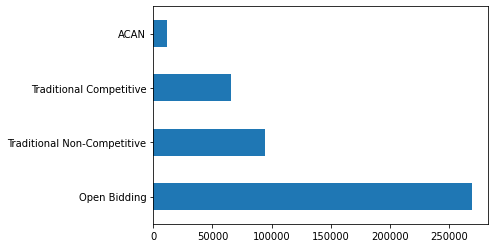

In [28]:
contractHistory['solicitation-procedure-description_en'].value_counts().plot(kind = 'barh')

In [29]:
contractHistory['trade-agreement-description_en'].describe()

count     436587
unique        33
top         NONE
freq       95914
Name: trade-agreement-description_en, dtype: object

In [30]:
contractHistory['trade-agreement-description_en'].value_counts()

NONE                                                                          95914
Canadian Free Trade Agreement (CFTA)                                          83414
CETA / WTO-AGP / NAFTA / CFTA / FTAs with Peru / Colombia / Panama / Korea    68349
WTO-AGP/NAFTA/AIT/Canada FTAs with Peru/Colombia/Panama                       45872
NAFTA / CFTA / FTAs with Peru / Colombia / Panama / Korea                     32837
Agreement on Internal Trade (AIT)                                             32158
NAFTA/AIT/Canada FTAs with Peru/Colombia/Panama                               28236
WTO-AGP/AIT                                                                   16089
CETA / WTO-AGP / NAFTA / FTAs with Peru / Colombia / Panama / Korea            8301
GATT/NAFTA/AIT                                                                 4948
CETA / CFTA                                                                    4665
NAFTA / FTAs with Peru / Colombia / Panama / Korea                          

In [31]:
contractHistory['supplier-standardized-name'].describe()

count                                    441210
unique                                    36355
top       SIMEX DEFENCE INC / DEFENSE SIMEX INC
freq                                       4305
Name: supplier-standardized-name, dtype: object

In [32]:
contractHistory['supplier-standardized-name'].value_counts()

SIMEX DEFENCE INC / DEFENSE SIMEX INC    4305
COSSETTE MEDIA                           3516
JHT DEFENSE INC                          2699
COSSETTE COMMUNICATION INC               2647
MICROSOFT LICENSING, GP                  2120
                                         ... 
UNIVERSITY OF KENTUCKY                      1
ENVIROTEL 3000 INC                          1
ADVANCED IMAGING DEVICES GMBH               1
CAMBRIDGE VISCOSITY, INC                    1
THE TREADMILL FACTORY                       1
Name: supplier-standardized-name, Length: 36355, dtype: int64

In [33]:
contractHistory['supplier-address-city'].describe()

count     441091
unique      7261
top       Ottawa
freq       80001
Name: supplier-address-city, dtype: object

In [34]:
contractHistory['supplier-address-city'].value_counts()

Ottawa                 80001
Toronto                21108
Mississauga            15614
Calgary                 9807
Montreal                9524
                       ...  
Sainte-Hénédine            1
REDONDO BEACH              1
Vicomaggio (Arezzo)        1
Saulnierville              1
SAN DIMAS                  1
Name: supplier-address-city, Length: 7261, dtype: int64

In [35]:
contractHistory['supplier-address-prov-state'].describe()

count      430737
unique         64
top       Ontario
freq       190079
Name: supplier-address-prov-state, dtype: object

In [36]:
contractHistory['supplier-address-prov-state'].value_counts()

Ontario             190079
Quebec               84105
British Columbia     32371
Alberta              27917
Nova Scotia          20233
                     ...  
Vermont                 29
Mississippi             22
Arkansas                19
South Dakota            14
Wyoming                  9
Name: supplier-address-prov-state, Length: 64, dtype: int64

In [37]:
contractHistory['supplier-address-country'].describe()

count     441210
unique       115
top       Canada
freq      398099
Name: supplier-address-country, dtype: object

In [38]:
contractHistory['supplier-address-country'].value_counts()

Canada                   398099
United States             32818
Germany                    3241
United Kingdom             2538
Netherlands                 441
                          ...  
Venezuela                     1
Brunei Darussalam             1
Virgin Islands (U.S.)         1
Bermuda                       1
Guam                          1
Name: supplier-address-country, Length: 115, dtype: int64

In [39]:
contractHistory['supplier-address-postal-code'].describe()

count     438200
unique     27226
top       H9R1A6
freq        4305
Name: supplier-address-postal-code, dtype: object

In [40]:
contractHistory['supplier-address-postal-code'].value_counts()

H9R1A6        4305
M6K1X8        3516
G1K7R1        2942
H4R2E9        2730
89511         2122
              ... 
60604-3562       1
P1L1G4           1
45014            1
C1N3J2           1
91773            1
Name: supplier-address-postal-code, Length: 27226, dtype: int64

In [41]:
contractHistory['organization-employee-count_en'].describe()

count                 441208
unique                    14
top       20 to 49 employees
freq                   71520
Name: organization-employee-count_en, dtype: object

In [42]:
contractHistory['organization-employee-count_en'].value_counts()

20 to 49 employees         71520
10 to 19 employees         50606
1 to 4 employees           48806
5 to 9 employees           46694
50 to 99 employees         43309
200 to 499 employees       38205
100 to 199 employees       35509
5000 employees and over    22845
500 to 999 employees       21979
UNKNOWN                    19256
2500 to 4999 employees     14947
1500 to 2499 employees     12717
1000 to 1499 employees     11643
Self-employed               3172
Name: organization-employee-count_en, dtype: int64

<AxesSubplot:>

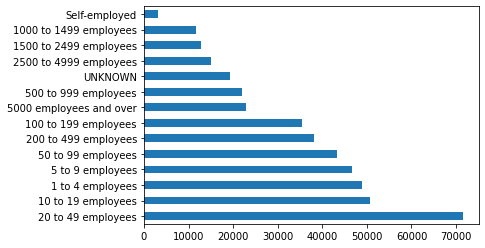

In [43]:
contractHistory['organization-employee-count_en'].value_counts().plot(kind = 'barh')

In [44]:
contractHistory['end-user-entity_en'].describe()

count                                          441210
unique                                            132
top       Public Works and Government Services Canada
freq                                           182963
Name: end-user-entity_en, dtype: object

In [45]:
contractHistory['end-user-entity_en'].value_counts()

Public Works and Government Services Canada    182963
Department of National Defence                 130899
Fisheries and Oceans Canada                     16470
Correctional Service of Canada                  11339
Canadian Commercial Corporation                  7686
                                                ...  
CANADIAN MUSEUM OF IMMIGRATION AT PIER 21           1
Canadian Museum for Human Rights                    1
Canadian Museum of Nature                           1
National Gallery of Canada                          1
INDIGENOUS SERVICES CANADA                          1
Name: end-user-entity_en, Length: 132, dtype: int64

In [46]:
contractHistory['contracting-entity-office-name_en'].describe()

count     431285
unique      3422
top         NDHQ
freq       19931
Name: contracting-entity-office-name_en, dtype: object

In [47]:
contractHistory['contracting-entity-office-name_en'].value_counts()

NDHQ                              19931
CONSOLIDATED PROC LP ICPSS        16759
BUSINESS MANAGEMENT DIR.          16353
COMMANDING  OFFICER               12930
CONSOLIDATED PROC HL ICPSS        12685
                                  ...  
31 SVC BN TECH SERV (MAINT)           1
GTIS COMSEC                           1
WHITEHORSE CADET SUM.TRAIN.CTR        1
INTERNATL&INTERGOVTL AFFAIRS          1
SMRC                                  1
Name: contracting-entity-office-name_en, Length: 3422, dtype: int64

In [48]:
contractHistory['contracting-address-street-1'].describe()

count                 441182
unique                  3140
top       101 COLONEL BY DR.
freq                   25490
Name: contracting-address-street-1, dtype: object

In [49]:
contractHistory['contracting-address-street-1'].value_counts()

101 COLONEL BY DR.          25490
PORTAGE III 7B3             20515
PORTAGE III 6B1             15962
PORTAGE III 7B1             13245
CFSD MONTREAL               12930
                            ...  
495 PROSPECT ST                 1
PL.VANIER TWR B 10TH FL.        1
PORTAGE IV 8TH FL.              1
PETAWAWA                        1
101 PR COLONEL BY               1
Name: contracting-address-street-1, Length: 3140, dtype: int64

In [50]:
contractHistory['contracting-address-street-2'].describe()

count            308117
unique             1561
top       11 LAURIER ST
freq              82908
Name: contracting-address-street-2, dtype: object

In [51]:
contractHistory['contracting-address-street-2'].value_counts()

11 LAURIER ST                    82908
6363 RUE NOTRE DAME ST E.        12930
101 COLONEL BY DR.               11587
50 O CONNOR ST                    4416
800 RUE DE LA GAUCHETIERE O.      4131
                                 ...  
P.O.BOX 220                          1
RAMP #7 - 45 SACRE COEUR BLVD        1
5421 ROBERTSON RD                    1
130 BENTLEY AVE                      1
25TH FLOOR, RM 2501                  1
Name: contracting-address-street-2, Length: 1561, dtype: int64

In [52]:
contractHistory['contracting-address-city'].describe()

count     441182
unique       440
top       OTTAWA
freq      130007
Name: contracting-address-city, dtype: object

In [53]:
contractHistory['contracting-address-city'].value_counts()

OTTAWA        130007
GATINEAU       72006
Gatineau       31369
MONTREAL       24289
EDMONTON       13144
               ...  
MERRIT             1
CARDSTON           1
BURGEO             1
DELORAINE          1
ANTIGONISH         1
Name: contracting-address-city, Length: 440, dtype: int64

In [54]:
contractHistory['contracting-address-prov-state'].describe()

count      440905
unique         13
top       Ontario
freq       166823
Name: contracting-address-prov-state, dtype: object

In [55]:
contractHistory['contracting-address-prov-state'].value_counts()

Ontario                      166823
Quebec                       156348
Alberta                       27574
British Columbia              24574
Nova Scotia                   21081
Manitoba                      12862
New Brunswick                 11444
Newfoundland and Labrador      8225
Saskatchewan                   6927
Prince Edward Island           3352
Northwest Territories          1272
Yukon                           315
Nunavut                         108
Name: contracting-address-prov-state, dtype: int64

<AxesSubplot:>

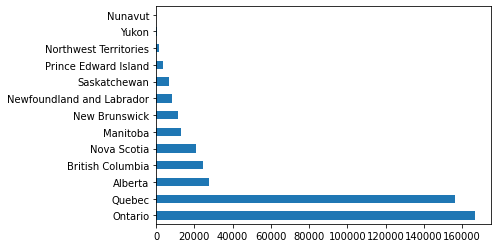

In [56]:
contractHistory['contracting-address-prov-state'].value_counts().plot(kind = 'barh')

In [57]:
contractHistory['contracting-address-postal-code'].describe()

count     441180
unique      1196
top       K1A0S5
freq      100214
Name: contracting-address-postal-code, dtype: object

In [58]:
contractHistory['contracting-address-postal-code'].value_counts()

K1A0S5    100214
K1A0K2     42335
H1N2E9     13430
V6Z0B9      9980
B3K5X5      8591
           ...  
N0H2L0         1
J4Z3T8         1
J8Y6W4         1
B2A3M4         1
V1Y5V5         1
Name: contracting-address-postal-code, Length: 1196, dtype: int64

In [59]:
contractHistory['contracting-address-country' ].describe()

count     441182
unique         4
top       Canada
freq      440905
Name: contracting-address-country, dtype: object

In [60]:
contractHistory['contracting-address-country'].value_counts()

Canada     440905
Germany       274
Haiti           2
France          1
Name: contracting-address-country, dtype: int64

<AxesSubplot:>

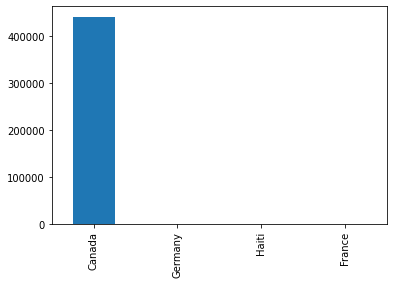

In [61]:
contractHistory['contracting-address-country'].value_counts().plot(kind = 'bar')

In [62]:
contractHistory['procurement-entity-name_en'].describe()

count                                          441210
unique                                              1
top       Public Works and Government Services Canada
freq                                           441210
Name: procurement-entity-name_en, dtype: object

In [63]:
contractHistory['procurement-entity-name_en'].value_counts()

Public Works and Government Services Canada    441210
Name: procurement-entity-name_en, dtype: int64